# Time series forecasting fundamentals with tensorflow + Project 3: BitPredict 💰💷📈

⚠️ **Note:** This is not financially advicable.

Let's write some tensorflow code to predict the price of Bitcoin base on the historical prices of bitcoin.

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-01-14 08:56:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2023-01-14 08:56:39 (19.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Get data

We're going to be using the historical price of bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here

In [ ]:
# Import with pandas
import pandas as pd
# Let's read in our bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=['Date'], index_col=['Date']) # parse the date column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


We've collected the historical price of Bitcouin for the past ~8 years but there's 2787 samples.

Typicall deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can be thousands to tens of thousands to millions)

A smaller number of samples is something you'll usually run into in time series forecasting.

> 🔑**Note:** The **seasonality** of a time series dataset is referred as an number of samples per year. So for our Bitcoin data, So for our Bitcoin data it has seasonality of daily or value of 35 because we collect one sample per day meaning we'll get 365 samples a year.

## Types of time series (various patterns in Time Series that you sould be aware of):

1. Trend - Time series has a clear long-term increase or decrease(may or may not be linear).
2. Seasonal - Time series is affected by seasonal factors such as time of the year (e.g. increased sales towards the end of the year).
3. Cyclic - Time series shows rises and falls over an unfixed period, these tend to be longer/more variable than seasonal patterns.

In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 may 2021", fontsize=16)
plt.legend(fontsize=14)

In [ ]:
## Importing time siries data with Python's CSV module
import csv
from datetime import datetime
timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r')  as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # skip the first line (this get's rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d')) # get the dates as dates not strings
    btc_price.append(float(line[2]))


# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
#import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title('Price of Bitcoin from 1 october 2013 to 18 May 2021')
plt.xlabel('BTC Price')
plt.ylabel('Price');

## Format data part 1: Create train and test sets of our time series data


### Creating train and test sets with time series data (the wrong way)

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test_data')
plt.xlabel('Date')
plt.ylabel('BTC_price')
plt.legend(fontsize=14)
plt.show();

### Create train and test sets the right way for time series(the right way)


In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices))

# Create train data splits (everthing before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label = 'Train data')
plt.scatter(X_test, y_test, s=5, label = 'Test data')
plt.ylabel('BTC price')
plt.xlabel('Date')
plt.title('Price of Bitcoin from 1 october 2013 to 18 May 2021')

Text(0.5, 1.0, 'Price of Bitcoin from 1 october 2013 to 18 May 2021')

## Create a plotting function 
Typing plotting code is Tedious, let's functionize it.

In [ ]:
# Create a function to plot a time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None, figsize=None):
  """
  Plots timesteps (a series of points in time) against valuess (a series of values across timesteps).

  Parameters

  ----------

  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot
  end: where to end the plot
  label: label to show on plot about values
  figsize: Pass in a tuple of height and width
  """
  # Plot the series 
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values = y_train, label='Train_data')
plot_time_series(timesteps=X_test, values = y_test, label = 'Test data')

## Modelling experiments 
We've got some bitcoin historic data, to model it, let's run a series of modelling experiments and see which model performs best

## Model 0: Nauve forecast (baseline)
The formula looks like this 

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at stimestep t(y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1.

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
# Plot naive forcast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')
plot_time_series(timesteps=X_test[1:],values=naive_forecast, format = '-', label="Naive forecast" )

**AUTOREGRESSIVE**

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're prediction a number, so that means we have a form of a regression problem.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean squared error
* (Symettric) MAPE/sMAPE - mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics lower is better, for example, an MAE of 0 that is better than MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts compare against the actual values?**

In [ ]:
import tensorflow as tf 

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Impplement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/ mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae':mae.numpy(),
          "mse":mse.numpy(),
          'rmse':rmse.numpy(),
          'mape':mape.numpy(),
          'mase':mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred = naive_forecast)


In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Format Data  Part 2: Windowing our dataset

Why do we way?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
y_train.shape

(2229,)

In [ ]:
# What we want to do with our bitcoin data
print(f"We want to use this: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of bitcoin data to make the prediction


In [ ]:
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for widowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output([0, 1, 2, 3, 4, 5, 6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
list1 = tf.expand_dims(tf.range(8), axis=0)

In [ ]:
list1.shape

TensorShape([1, 8])

In [ ]:
# Test out the Window labellling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

We've got a way to label our windowed data.

However it only works on a small scale.

We need a way to do this across our entire time series.

We could do this with python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multiple window steps for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Use the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` fuction we created above to turn the window steps into windows with specific horizon.

In [ ]:
import numpy as np

In [ ]:
window_step = np.expand_dims(np.arange(WINDOW_SIZE+ HORIZON), axis=0)
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the ensd for labelling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis =0)

  # 2. Use numpy indexing to create a 2D array of multiple windows
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T 

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 5. Get the labelled_windows()
  windows, labels = get_labelled_windows(windowed_array)
  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices)

In [ ]:
full_windows[1], full_labels[1]

(array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]), array([124.049]))

In [ ]:
# Mdke the train/ test splits 
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching of windows and labels into train and test splits.
  """
  splits_size = int(len(windows) * (1-test_split)) # This will default to 80% percent train and 20% split
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

In [ ]:
y_test[-1], train_labels[-1]

(43144.4712908603, array([8749.52059102]))

In [ ]:
# Check to see if trian labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
np.squeeze(train_labels).shape

(2229,)

In [ ]:
y_train.shape

(2229,)

In [ ]:
train_labels[:5]

array([[123.033  ],
       [124.049  ],
       [125.96116],
       [125.27966],
       [125.9275 ]])

## Make a modelling checkpoint 

Because our model's performance will fluctuate from experiment to experment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs best on epoch 55 (but we're training for 100 epochs), we want to load and save weights of epoch 55 for that model.


In [ ]:
import os

# Create a function to implement callback with a specific filename

def create_model_checkpoint(model_name, save_path='model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            moniter='val_loss',
                                            verbose=0, save_best_only = True)


## Model 1: Dense model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units ReLU
* An output layer with linear activation (no activation)
* Adam optimzation and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs 

Why these values?

I picked them out of experimentation.

To find the optimum ones read hyperparmeter tuning tensorflow.

* **Parameters:** values a model learns on it's own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # Linear activation is the same as having no activation
], name='model_1_dense')

# 2. Compile 
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

# 3. Fit the model
model_1.fit(x=train_windows, y=train_labels,
            epochs=100,
            verbose=2,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 - 7s - loss: 2625.1882 - mae: 2625.1882 - mse: 18740874.0000 - val_loss: 5794.3320 - val_mae: 5794.3320 - val_mse: 60520272.0000 - 7s/epoch - 399ms/step
Epoch 2/100
18/18 - 1s - loss: 412.4135 - mae: 412.4135 - mse: 624885.0000 - val_loss: 1056.2572 - val_mae: 1056.2572 - val_mse: 3598042.0000 - 1s/epoch - 61ms/step
Epoch 3/100
18/18 - 0s - loss: 199.2589 - mae: 199.2589 - mse: 180611.5938 - val_loss: 1083.0709 - val_mae: 1083.0709 - val_mse: 3727219.2500 - 128ms/epoch - 7ms/step
Epoch 4/100
18/18 - 1s - loss: 174.4684 - mae: 174.4684 - mse: 153932.1250 - val_loss: 901.9988 - val_mae: 901.9988 - val_mse: 2733432.7500 - 986ms/epoch - 55ms/step
Epoch 5/100
18/18 - 1s - loss: 160.0893 - mae: 160.0893 - mse: 140116.2500 - val_loss: 893.4445 - val_mae: 893.4445 - val_mse: 2686459.0000 - 753ms/epoch - 42ms/step
Epoch 6/100
18/18 - 1s - loss: 161.1893 - mae: 161.1893 - mse: 137636.7500 - val_loss: 873.4075 - val_mae: 873.4075 - val_mse: 2536813.2500 - 1s/epoch - 69ms/step
Ep

In [ ]:
# Evaluate model on tst data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 718.6263 - mae: 718.6263 - mse: 1548660.7500


[718.6262817382812, 718.6262817382812, 1548660.75]

In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiment/model_1_dense')

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7581 - mae: 570.7581 - mse: 1181038.1250


[570.7581176757812, 570.7581176757812, 1181038.125]

In [ ]:
model_1_preds = model_1.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
## plot_time_series(timesteps=X_train, values=y_train, label='Train data')
offset = 400
plt.figure(figsize=(10,7))
plot_time_series(timesteps=np.expand_dims(X_test[-len(test_windows):], axis=1), values=test_labels, label= 'Test data', start = offset)
plot_time_series(timesteps=np.expand_dims(X_test[-len(test_windows):], axis=1), values=model_1_preds, label = 'Pred data', format='-', start = offset)


## Making forecasts with a model (on the test data)

To make 'forecasts' oon the test dataset (note: these won't be actual forecast, they're only psuedo forecasts because because actual forecast are into the future)

Let's write a fuction to:
1. Take in a train model
2. Takes in some some input data (same kind of data the model is trained on)
3. Passe the input data to the model's predict method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)


In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(551, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8713.385 , 8705.573 , 8552.085 , 8452.674 , 8536.146 , 8288.028 ,
        8125.9673, 8061.4497, 7713.9146, 7319.058 ], dtype=float32)>)

In [ ]:
test_labels.shape, model_1_preds.shape

((551, 1), TensorShape([551]))

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

In [ ]:
model_1_results

{'mae': 570.7581,
 'mse': 1181038.1,
 'rmse': 1086.7557,
 'mape': 2.5473766,
 'mase': 0.99617255}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Model 2: Dense (window=30, horizon=1)

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # 30 use 30 timesteps in past 

In [ ]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, test_split=0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [ ]:
tf.random.set_seed(42)

# Create a model 
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name= 'model_2_Dense')

# Compile
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
# Fit the model 
model_2.fit(train_windows, train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data = (test_windows, test_labels),
            callbacks=create_model_checkpoint(model_name=model_2.name))

In [ ]:
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 632.3499


632.3499145507812

In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiment/model_2_Dense')

In [ ]:
model_2_preds = make_preds(model_2, input_data =test_windows)

17/17 [==============================] - 0s 1ms/step


In [ ]:
test_labels.shape, model_2_preds.shape

((528, 1), TensorShape([528]))

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)
model_2_results

{'mae': 630.8033,
 'mse': 1354821.5,
 'rmse': 1163.968,
 'mape': 2.779668,
 'mase': 1.0676832}

In [ ]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels, start=offset, label="Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], start=offset, values= model_2_preds, label='model_2_preds', format='-')

## Model 3: Same as model 2 but with an increased window size and horizon

In [ ]:
WINDOW_SIZE = 30
HORIZON = 7

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name = 'model_3_dense')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=create_model_checkpoint(model_name=model_3.name))



Epoch 1/100
18/18 [==============================] - 1s 43ms/step - loss: 1509.0067 - val_loss: 3146.0757
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 477.3933 - val_loss: 1719.4102
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 331.7382 - val_loss: 1615.9690
Epoch 4/100
18/18 [==============================] - 1s 38ms/step - loss: 276.5014 - val_loss: 1380.8160
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 252.7955 - val_loss: 1408.6720
Epoch 6/100
18/18 [==============================] - 1s 42ms/step - loss: 237.8353 - val_loss: 1302.3428
Epoch 7/100
18/18 [==============================] - 1s 30ms/step - loss: 225.0267 - val_loss: 1290.1144
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 218.8327 - val_loss: 1305.4333
Epoch 9/100
18/18 [==============================] - 0s 24ms/step - loss: 207.2150 - val_loss: 1149.6581
Epoch 10/100
18/18 [==============================] - 0s

In [ ]:
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 734.1420


734.1419677734375

In [ ]:
model_3 = tf.keras.models.load_model('/content/model_experiment/model_3_dense')
model_3.evaluate(test_windows, test_labels)
     

17/17 [==============================] - 0s 2ms/step - loss: 680.2458


680.245849609375

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

17/17 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[7172.6763, 7171.7524, 7283.7324, 7310.259 , 7175.0786, 7259.059 ,
        7253.4507],
       [7238.9365, 7311.574 , 7280.185 , 7302.62  , 7312.242 , 7286.4517,
        7344.777 ],
       [7122.694 , 7204.4536, 7262.3184, 7295.5205, 7200.8286, 7232.116 ,
        7275.2505],
       [7141.392 , 7197.9736, 7140.1445, 7148.717 , 7127.179 , 7152.3384,
        7210.9536],
       [6982.399 , 6892.253 , 7015.675 , 7026.2163, 6999.7207, 6985.5874,
        7066.272 ]], dtype=float32)>

In [ ]:
test_labels.shape

(522, 1)

In [ ]:
model_3_preds.shape

TensorShape([522, 7])

In [ ]:
model_2_preds.shape

TensorShape([528])

In [ ]:

# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(test_labels,
                                 y_pred=model_3_preds)
model_3_results
     

{'mae': array([  49.731304,  209.6589  ,  114.86593 ,  276.31744 ,  411.41733 ,
         628.91016 ,   47.13065 ,   56.068916,   47.806572,   37.301968,
          74.047226,   62.685894,  100.62577 ,   78.45927 ,   61.87974 ,
          96.62228 ,   58.972378,  162.07568 ,  200.39014 ,   62.134907,
         205.80295 ,  235.33119 ,  134.78146 ,   23.64481 ,  263.01703 ,
         396.52066 ,  104.78997 ,  287.6058  ,  113.66539 ,   57.146553,
          41.166016,  116.56299 ,  534.6025  ,  228.26717 ,   70.19657 ,
          97.18513 ,   33.536133,  359.7256  ,  141.51047 ,   58.463726,
         129.68652 ,  351.66644 ,  107.9488  ,  175.80916 ,  151.85435 ,
         357.04535 ,  349.7603  ,  243.79338 ,  280.2027  ,  144.08594 ,
         144.84543 ,   95.30287 ,  183.37389 ,  244.4407  ,  344.58594 ,
         192.71275 ,   89.16002 ,   66.363976,  239.47838 ,  204.75642 ,
         251.62305 ,  167.32576 ,   90.3517  ,   74.874306,  575.3048  ,
         316.0141  ,  375.8182  ,  384.1469 

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mase = tf.reduce_mean(mase)
    mape = tf.reduce_mean(mape)

  return {'mae':mae.numpy(),
          "mse":mse.numpy(),
          'rmse':rmse.numpy(),
          'mape':mape.numpy(),
          'mase':mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)

In [ ]:
model_3_results

{'mae': 680.24585,
 'mse': 1516430.1,
 'rmse': 707.8125,
 'mape': 2.9713836,
 'mase': 1.1398219}

In [ ]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps = X_test[-len(test_windows):], start=offset, values= tf.reduce_mean(model_3_preds, axis=1), label='model_3_preds', format='-')

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10,7), kind='bar')
     

## Model 4: Conv1D

In [ ]:
HORIZON =1 # predict next day of Bitcoin price
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create the windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon = HORIZON)
len(full_windows) ,len(full_labels)


(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

**Input shape for Conv1D:** 3+D tensor with shape: `(batch_size, steps, input_dim)`

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])


In [ ]:
x.shape

TensorShape([7])

In [ ]:
expanded_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape:{expanded_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n{expanded_dim_layer(x)}")

Original shape: (7,)
Expanded shape:(7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 596.7828


596.7827758789062

In [ ]:
# Load back in it's best performing model
model_4 = tf.keras.models.load_model('/content/model_experiment/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 575.1334


575.1334228515625

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8756.231 , 8697.727 , 8546.184 , 8480.0625, 8531.183 , 8290.774 ,
       8142.1045, 8085.7427, 7722.7314, 7336.117 ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 575.1334,
 'mse': 1197862.1,
 'rmse': 1094.4689,
 'mape': 2.573398,
 'mase': 1.003809}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data:

We use the same data we used previously because of the same window_size and horizon.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model_5 and evaluate on test data
model_5 = tf.keras.models.load_model('/content/model_experiment/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 591.4647


591.4647216796875

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8777.49 , 8722.196, 8529.93 , 8498.44 , 8529.237], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 591.4647,
 'mse': 1252141.8,
 'rmse': 1118.9913,
 'mape': 2.6536808,
 'mase': 1.0323129}

🔑**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results.

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Make a multivariate timeseries

Before we can add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Elon Tusk tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?
* Bitcoin halving events 

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the Bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (it starts from 01 october 2013)
block_reward_2 = 25 # 8 noverber 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 15 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')


In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
block_reward_2_days =(block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_4_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, (block_reward_3_days)

(1012, 1012)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Will use the pandas.DataFrame.shift() method to window our multivariate data.

In [ ]:
# Setup our datset hyperparameters
# The horizon and the window_size are already set to what we want

# Make a copy of Bitcoin historical data with black reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()


# Add windowed columns 
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed['Price'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
split_size = int(len(X) *0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]


## Model 6: Dense(Multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make a multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

# Compile
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())
# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks = [create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 28ms/step - loss: 1235.3019 - val_loss: 2063.1716
Epoch 2/100
18/18 [==============================] - 0s 24ms/step - loss: 351.3000 - val_loss: 1903.8107
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 235.8328 - val_loss: 1323.7053
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 209.2582 - val_loss: 1097.7729
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.4991 - val_loss: 1109.0446
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 187.1012 - val_loss: 1036.4791
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 181.9269 - val_loss: 1016.2438
Epoch 8/100
18/18 [==============================] - 0s 24ms/step - loss: 175.4612 - val_loss: 977.7067
Epoch 9/100
18/18 [==============================] - 0s 24ms/step - loss: 170.0684 - val_loss: 953.1131
Epoch 10/100
18/18 [==============================] - 0s 

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 604.0242


604.024169921875

In [ ]:
model_6 = tf.keras.models.load_model('/content/model_experiment/model_6_dense_multivariate')

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.9448


567.94482421875

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8840.198 , 8766.2705, 9041.262 , 8743.232 , 8724.363 , 8768.441 ,
       8663.021 , 8499.771 , 8466.169 , 8523.414 ], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                y_pred=model_6_preds)

In [ ]:
model_6_results

{'mae': 567.9448,
 'mse': 1163761.9,
 'rmse': 1078.778,
 'mape': 2.545226,
 'mase': 0.99772173}

## Model 7: N-BEATS algorithm

Let's build the biggest time series model we've build so far.

More specifically we're going to be replicating the algorithm in Figure 1 from the following paper: http://arxiv.org/pdf/1905.10437.pdf

why?
* We will see how to use Tensorflow layer subclassing (to make our custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building an testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensoFlow, we've got to create it.
To create a custom layer and model we can use subclassing.

In [ ]:

# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do so we'll create some dummy inputs and outputs.

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # input shape to the model has to reflect dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy input to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing data for the N-Beats algorithms using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide:
http://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBeats data inputs (N-Beats works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price + {i +1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

In [ ]:
bitcoin_prices_nbeats.head()

,Price,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels 
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X) * 0.8)

X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API 
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-Beats algorithm

The N-Beats algorithm has a fair few number of parameters, many of them can be found table 18 https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
INPUT_SIZE = 7

In [ ]:
# Values from N-Beats paper 
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
N_INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for our residual connections (subtract and add)

The N-BEATS algorithms uses double residual stacking to help train it's deeper architecture.

For more residual connections: https://paperswithcode.com/method/resnet

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors:{tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtrated:{subtracted.numpy()}")
print(f"Added:{added.numpy()}")

Input tensors:[10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtrated:[10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlocks` (This'll be the initial block used for the network, the rest will be created as part of the stack )
2. Create an input layer for the N-BEATS stack (we'll be using the keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (4)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to crete blocks which return backcast and block level forecast
6. Create the double residual stacking using subtract and add layers
7. Crete the double inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of the N-BEATs paper
9. Fit the N-BEATS model for 5k epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early stopping - because the model will be trained for so long, we'll stop it early if it stops improving
  * Reduce LR or plateau - if a model stops improving, try lowering the learning to reduce the amount it updates it's weights each time (take smaller steps towards best performance)

In [ ]:
%%time
tf.random.set_seed(42)

# 1. Setup an instance on NBeatsBlock 
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

# 2. Create input to stack
stack_inputs = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_inputs)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): 
  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                                theta_size=THETA_SIZE,
                                                horizon=HORIZON,
                                                n_neurons=N_NEURONS,
                                                n_layers = N_LAYERS,
                                                name=f"NBeatsBlock_{i}")(residuals)
  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name =f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name = f"add_{i}")


# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_inputs, outputs=forecast, name='model_7_NBeats')

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLRonPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200, restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=100,
                                                            verbose=1)])


Epoch 608: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 708: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 58s, sys: 4.42 s, total: 2min 2s
Wall time: 2min 7s


In [ ]:
# Evaluate N-Beates model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 16ms/step - loss: 581.2800


581.280029296875

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]


1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8928.783, 8820.56 , 9014.028, 8824.139, 8778.092, 8754.762,
       8705.287, 8549.267, 8500.26 , 8530.116], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                y_pred=model_7_preds)

In [ ]:
model_7_results

{'mae': 581.28,
 'mse': 1216205.4,
 'rmse': 1102.817,
 'mape': 2.6184742,
 'mase': 1.021148}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 570.7581,
 'mse': 1181038.1,
 'rmse': 1086.7557,
 'mape': 2.5473766,
 'mase': 0.99617255}

This goes to show the power of small networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-Beats architecture we've create

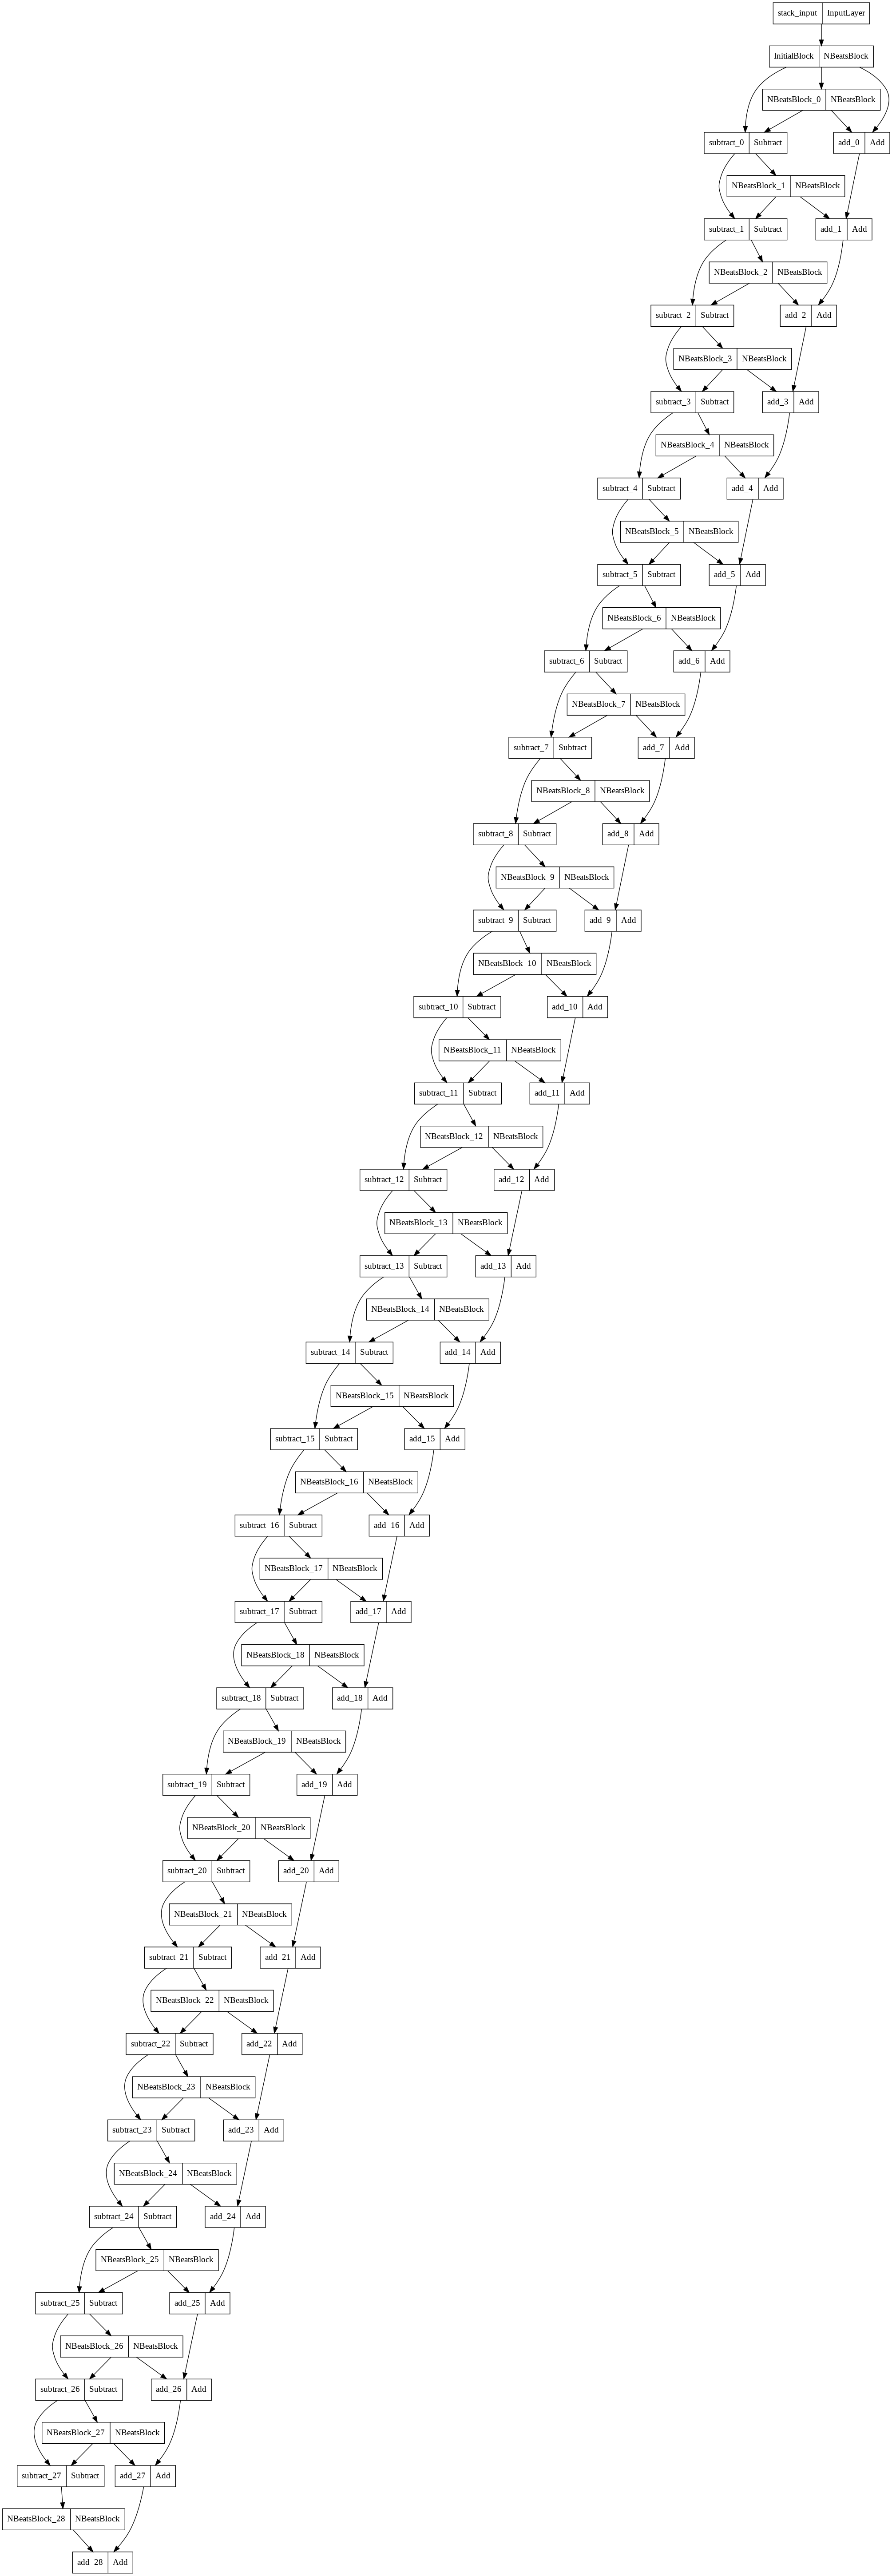

In [ ]:
# Ploting the N-BEATS model and inspect the architecture
tf.keras.utils.plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many different models to predict a common goal.

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models(using different loss fuctions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae','mse','mape']):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
  For example, if num_iter, a list of 30 rained models will be returned:
  10 * len(['mae', 'mse', 'mape'])
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs, model number:{i}")

      # Construck a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on 
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae','mse'])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                      patience=100,
                                                      verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing:mae for 1000 epochs, model number:0

Epoch 972: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing:mse for 1000 epochs, model number:0

Epoch 612: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 728: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 828: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing:mape for 1000 epochs, model number:0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mae for 1000 epochs, model number:1

Epoch 876: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing:mse for 1000 epochs, model number:1

Epoch 412: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 512: ReduceLROnPlateau redu

In [ ]:
len(ensemble_models)

15

### Make predictions with our ensemble model 


In [ ]:
# Create a function which uses a list of trained models to make a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
!nvidia-smi

Sat Jan 14 09:08:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    27W /  70W |   1910MiB / 15109MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create a list of ensemble predictions
%%time 
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 34ms/step
CPU times: user 612 ms, sys: 36.3 ms, total: 648 ms
Wall time: 750 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8788.795,  8763.706,  9049.752, ..., 50271.395, 49273.15 ,
        46432.72 ],
       [ 8766.172,  8742.858,  9054.566, ..., 49367.57 , 48527.66 ,
        45340.43 ],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8952.138,  8787.858,  9063.391, ..., 49548.92 , 49918.645,
        46642.273],
       [ 8730.589,  8802.753,  9104.47 , ..., 49608.105, 48550.926,
        45021.184],
       [ 8814.644,  8759.131,  9038.696, ..., 49705.168, 48039.996,
        45815.457]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)

In [ ]:
ensemble_results

{'mae': 567.114,
 'mse': 1146080.4,
 'rmse': 1070.5514,
 'mape': 2.5829096,
 'mase': 0.99626225}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 570.7581,
 'mse': 1181038.1,
 'rmse': 1086.7557,
 'mape': 2.5473766,
 'mase': 0.99617255}

Our ensemble preds come out in multiple dimensions but to combine them into point **predictings** we can leverage the mean or median of all the predictions.

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Se far we've been making point prediction with our models.

E.g. horizon =1, our model predicts tomorrow's price of Bitcoin will be 50,000USD

Would'nt it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

To get the 95% confidence predicition interval for the deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized model(we've got this because of our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply the starndard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of obsevations fall within standard deviation of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the prediction made in (1)

In [ ]:
# Find the upper and lower bounds of the ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models
  # 2. Measure the standard deviation 
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the sandard deviation with 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval uppen and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval 

  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% pecent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8691.129, 8734.143, 9005.914, 8636.502, 8676.87 , 8661.947,
        8606.936, 8403.716, 8400.63 , 8498.286], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8893.697, 8820.205, 9127.951, 8830.055, 8810.952, 8765.553,
        8730.309, 8555.06 , 8514.321, 8558.562], dtype=float32)>)

In [ ]:
%matplotlib inline

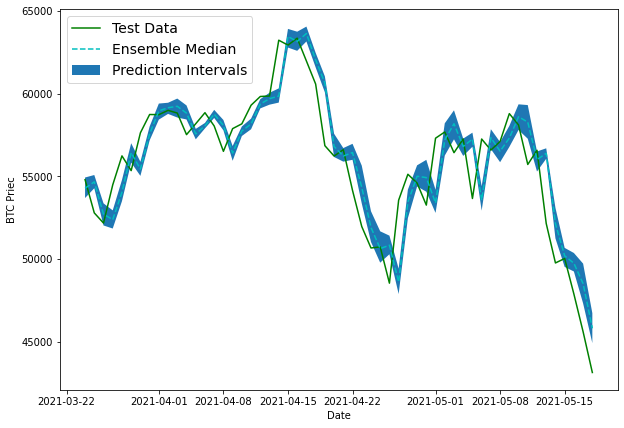

In [ ]:
# Get the median/mean values of our ensemble preds 
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the predictin intervals
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g',label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], ls = '--',color='c', label ='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Priec')
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14);

So far all of our model predictions have been lagging behind the test data..

As if they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑**Note:** These prediction intervals are estimating themsheves. And they have been created with the assumption that the model's data is from a normal distribution. 

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in ML seek out to qualitatively and qualitatively answer the questions:
1. What can my model know (with perfect data, what's possible for a model to know)
2. What doesn't my model know? (what can a model nevel predict? Or would it be helpful if a model could tell you that when it's making a prediction, it doesn't know if it's right or not?)

There are two major types of uncertainety in ML you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced and it is often referred as 'model' or 'coconut' uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [ ]:
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors
X_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((X_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (simple just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all the data to make future forecast
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 100

To make prediction into the future we want to make a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions)
and extract the last `WINDOW_SIZE` input value\
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which updates to remove the first value and append the latest value 

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values end.

  Returns future forecasts as a list of floats.
  """
  #2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]
  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecast on it's own forecast)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE on most recent preds (model was trained on WINDOW_SIZE widows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
# Make forecast into the future
future_forecasts  = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future = INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 42ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.47265625

1/1 [==============================] - 0s 13ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875

1/1 [==============================] - 0s 14ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375

1/1 [==============================] - 0s 15ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875

1/1 [==============================] - 0s 14ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.19921875

In [ ]:
np.array(future_forecasts)

array([55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633, 46879.715,
       48227.594, 53963.684, 49685.543, 47596.176, 48114.418, 48807.996,
       48623.85 , 50178.715, 52043.438, 48718.23 , 47757.723, 48962.785,
       49766.402, 49672.156, 50493.1  , 50629.957, 48536.293, 48572.42 ,
       49876.742, 50320.99 , 50039.164, 50281.773, 49961.01 , 48956.336,
       49500.586, 50476.26 , 50490.625, 50100.676, 50137.44 , 49907.637,
       49610.73 , 50219.047, 50742.004, 50492.223, 50165.32 , 50229.9  ,
       50192.598, 50220.188, 50659.74 , 50825.81 , 50520.906, 50355.6  ,
       50501.39 , 50574.297, 50674.047, 50906.586, 50886.492, 50662.777,
       50655.13 , 50837.234, 50922.43 , 50988.062, 51077.79 , 51012.355,
       50909.746, 50997.207, 51157.29 , 51206.46 , 51227.844, 51256.395,
       51218.594, 51212.324, 51327.156, 51435.812, 51448.492, 51452.297,
       51474.29 , 51479.61 , 51523.79 , 51623.31 , 51683.242, 51680.64 ,
       51691.75 , 51727.594, 51762.254, 51819.45 , 

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_data to start_data + into_future
  """
  start_date = start_date + np.timedelta64(offset, 'D') # specify start date and 'D' stands for day
  end_date = start_date + np.timedelta64(into_future, 'D') # specify end date

  return np.arange(start_date, end_date, dtype='datetime64[D]') # return a date range between start date and end date

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep 

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of time steps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE) 

In [ ]:
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
       '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07',
       '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
       '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15',
       '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
       '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01',
       '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05',
       '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
       '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
       '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17',
       '2021-07-18', '2021-07-19', '2021-07-20', '2021-

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecasts, 0, btc_price[-1])


In [ ]:
next_time_steps.shape, future_forecast.shape

((101,), (101,))

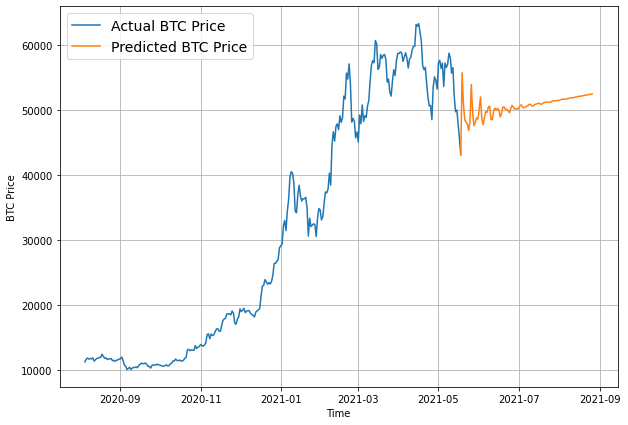

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format ='-', label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format='-', label='Predicted BTC Price')

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1]  = btc_price_turkey[-1] / 100 

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the time steps 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10]

numpy.datetime64('2021-05-09T00:00:00.000000000')

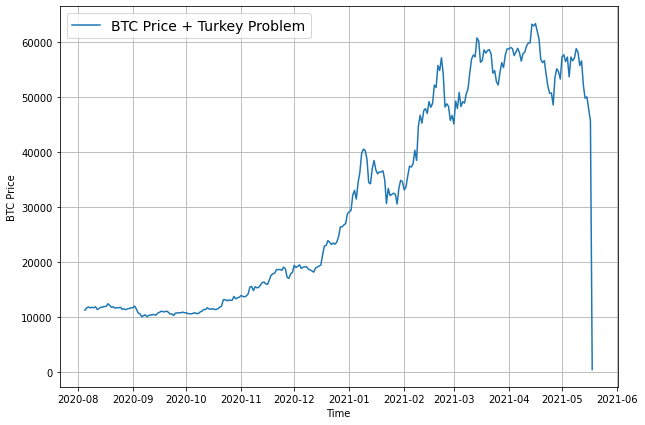

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 start=2500,
                 values=btc_price_turkey, format='-',
                 label='BTC Price + Turkey Problem')

In [ ]:
# Create trian and test sets for turkey  problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE,horizon = HORIZON )

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)


### Build a turkey model (model to predict on turkey data)


In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 786.2137


786.2136840820312

In [ ]:
turkey_model = tf.keras.models.load_model('/content/model_experiment/Turkey_Model')

In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 638.3048


638.3048095703125

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)

18/18 [==============================] - 0s 1ms/step


In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred = turkey_preds)
turkey_results

{'mae': 17144.766,
 'mse': 615487740.0,
 'rmse': 23743.305,
 'mape': 121.58286,
 'mase': 26.53158}

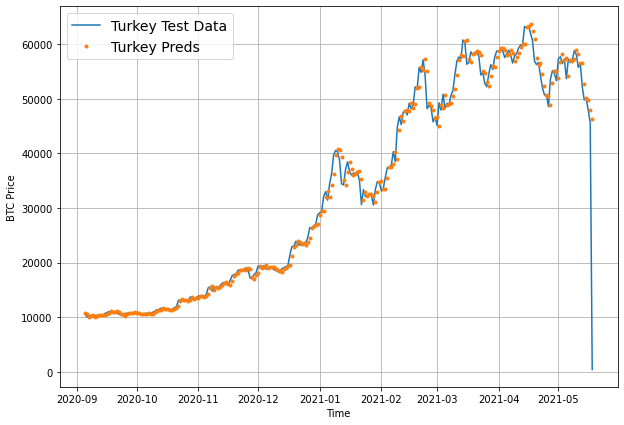

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,570.758118,1.181038e+06,1086.755737,2.547377,0.996173
model_2_dense_w30_h1,630.803284,1.354822e+06,1163.968018,2.779668,1.067683
model_3_dense_w30_h7,680.245850,1.516430e+06,707.812500,2.971384,1.139822
model_4_CONV1D,575.133423,1.197862e+06,1094.468872,2.573398,1.003809
model_5_LSTM,591.464722,1.252142e+06,1118.991333,2.653681,1.032313
model_6_multivariate,567.944824,1.163762e+06,1078.777954,2.545226,0.997722
model_8_NBEATs,581.280029,1.216205e+06,1102.817017,2.618474,1.021148
model_9_ensemble,567.114014,1.146080e+06,1070.551392,2.582910,0.996262
model_10_turkey,17144.765625,6.154877e+08,23743.304688,121.582863,26.531580


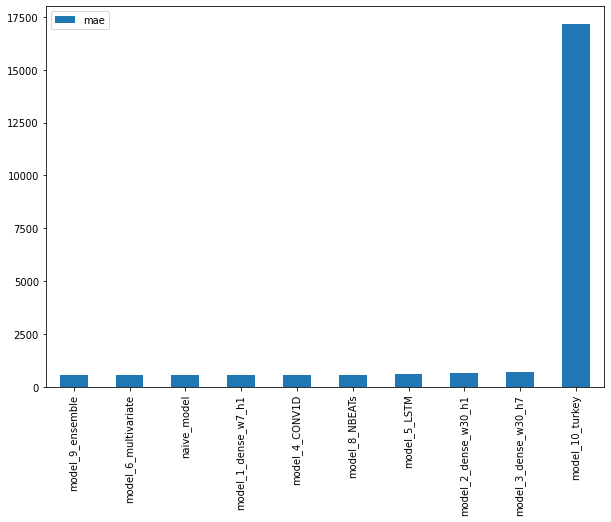

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");